<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/Dynamic_ML_Tunning_with_featSelect_SHAP_ROC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR&EEG_2022.08.11_final.csv")
classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))

In [3]:
dataset.head()

,Subjects,SubjectTypeClass,TestType,n0_gap_peak_ms_20ms,p1_gap_peak_ms_20ms,n1_gap_peak_ms_20ms,p2_gap_peak_ms_20ms,n2_gap_peak_ms_20ms,p3_gap_peak_ms_20ms,n0_nogap_peak_ms_20ms,...,MeanP_Gamma_50ms,TotalEEGPower_50ms,RelativeAlpha_50ms,RelativeBeta_50ms,RelativeTheta_50ms,RelativeDelta_50ms,DTR_50ms,DTABR_50ms,ATR_50ms,ABR_50ms
0,'01_AJW_30_02',Control,Test,101,147,214,263,366,105,149,...,0.000005,0.000064,0.1310,0.1700,0.396,0.303,0.764,2.32,0.332,0.775
1,'01_CGO_63_01',Control,Test,132,155,217,301,383,131,175,...,0.000001,0.000046,0.1990,0.1340,0.483,0.184,0.381,2.01,0.412,1.490
2,'01_KBJ_45_01',Control,Test,107,160,221,305,396,128,192,...,0.000144,0.000692,0.1130,0.3320,0.196,0.358,1.820,1.25,0.576,0.340
3,'02_KCH_26_02',Control,Test,77,200,233,268,379,166,120,...,0.000017,0.001010,0.0702,0.0288,0.308,0.593,1.930,9.10,0.228,2.440
4,'03_HMK_49_01',Control,Test,153,128,224,264,337,147,176,...,0.000002,0.000088,0.1290,0.0760,0.425,0.370,0.870,3.88,0.303,1.700


In [4]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 1]=encoder.fit_transform(dataset.iloc[:, 1])

In [17]:
X_ = dataset.iloc[:,4:]
y_ = dataset.iloc[:, 1]

#Feature Selection

<font color='red'> Warning: Run only one Type at a time</font>

**Type-1**

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


**Type-2**

In [14]:
from sklearn.feature_selection import SelectKBest,f_classif
bestfeatures_2=SelectKBest(f_classif, k=10)
fit = bestfeatures_f2fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

**Type-3**

In [18]:
from sklearn.feature_selection import SelectFpr, f_classif

bestfeatures_3=SelectFpr(f_classif, alpha=0.1)
fit = bestfeatures_3.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

<font color='blue' size=6><b>Input</b></font>

In [19]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 20


In [20]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

                         Specs      Score
182    p3_gap_peak_50msmp_50ms  29.777286
178    p1_gap_peak_50msmp_50ms  28.943612
207     gap_50msuc_n1p2_R_50ms  28.830587
168   p1p2_interval_nogap_50ms  27.979853
173   n1p3_interval_nogap_50ms  25.788322
181    n2_gap_peak_50msmp_50ms  24.112113
165   n0n2_interval_nogap_50ms  21.890297
200   p2n2_gap_nogap_diff_50ms  18.730306
73      gap_20msuc_n1p2_L_20ms  18.182582
209     gap_50msuc_n1p2_L_50ms  17.552783
71      gap_20msuc_n1p2_R_20ms  17.456283
46     p3_gap_peak_20msmp_20ms  16.757489
204     gap_50msuc_p1n1_R_50ms  16.445111
45     n2_gap_peak_20msmp_20ms  15.906518
42     p1_gap_peak_20msmp_20ms  15.880902
1          n1_gap_peak_ms_20ms  15.558168
33    p1n2_interval_nogap_20ms  15.009325
175   p2p3_interval_nogap_50ms  14.595137
211     gap_50msuc_n1p2n2_50ms  14.096806
187  n2_nogap_peak_50msmp_50ms  13.753050


In [ ]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [ ]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [ ]:
X_new.shape

(165, 20)

In [ ]:
y_new.shape

(165,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [ ]:
result={}



---





---



#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[13  2]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.83      0.56      0.67        18

    accuracy                           0.70        33
   macro avg       0.73      0.71      0.69        33
weighted avg       0.74      0.70      0.69        33

Accurecy:  0.696969696969697


1/200 round completed......................... Accurecy: 0.6666666666666666
2/200 round completed......................... Accurecy: 0.696969696969697
3/200 round completed......................... Accurecy: 0.6060606060606061
4/200 round completed......................... Accurecy: 0.5757575757575758
5/200 round completed......................... Accurecy: 0.6060606060606061
6/200 round completed......................... Accurecy: 0.6060606060606061
7/200 round completed......................... Accurecy: 0.6060606060606061
8/200 round completed......................... Accurecy: 0.6363636363636364
9/200 round completed......................... Accurecy: 0.5454545454545454
10/200 round completed......................... Accurecy: 0.5757575757575758
11/200 round completed......................... Accurecy: 0.5454545454545454
12/200 round completed......................... Accurecy: 0.5757575757575758
13/200 round completed......................... Accurecy: 0.5757575757575758
14/200 ro

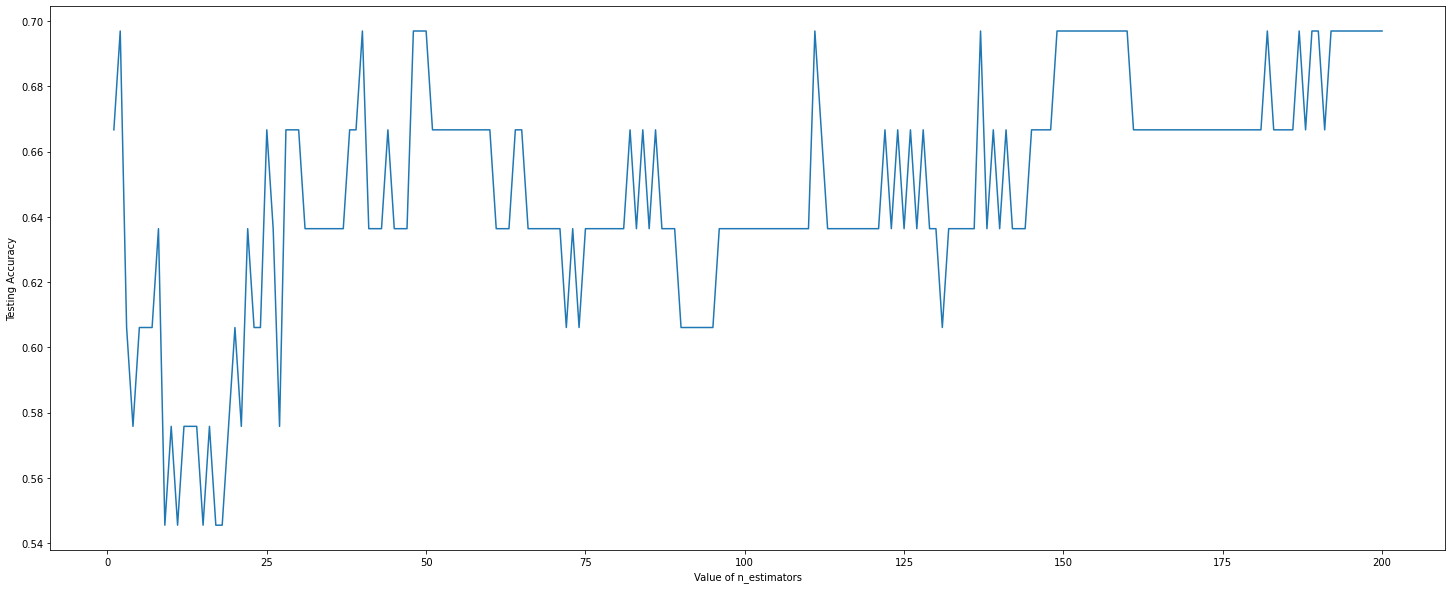

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[ 9  6]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.70      0.78      0.74        18

    accuracy                           0.70        33
   macro avg       0.70      0.69      0.69        33
weighted avg       0.70      0.70      0.69        33

Accurecy:  0.696969696969697




---



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.79      0.61      0.69        18

    accuracy                           0.70        33
   macro avg       0.71      0.71      0.70        33
weighted avg       0.72      0.70      0.70        33

Accurecy:  0.696969696969697


1/150 round completed......................... Accurecy: 0.6363636363636364
2/150 round completed......................... Accurecy: 0.6363636363636364
3/150 round completed......................... Accurecy: 0.7272727272727273
4/150 round completed......................... Accurecy: 0.6666666666666666
5/150 round completed......................... Accurecy: 0.6666666666666666
6/150 round completed......................... Accurecy: 0.6363636363636364
7/150 round completed......................... Accurecy: 0.6666666666666666
8/150 round completed......................... Accurecy: 0.6666666666666666
9/150 round completed......................... Accurecy: 0.696969696969697
10/150 round completed......................... Accurecy: 0.6666666666666666
11/150 round completed......................... Accurecy: 0.696969696969697
12/150 round completed......................... Accurecy: 0.6666666666666666
13/150 round completed......................... Accurecy: 0.6666666666666666
14/150 rou

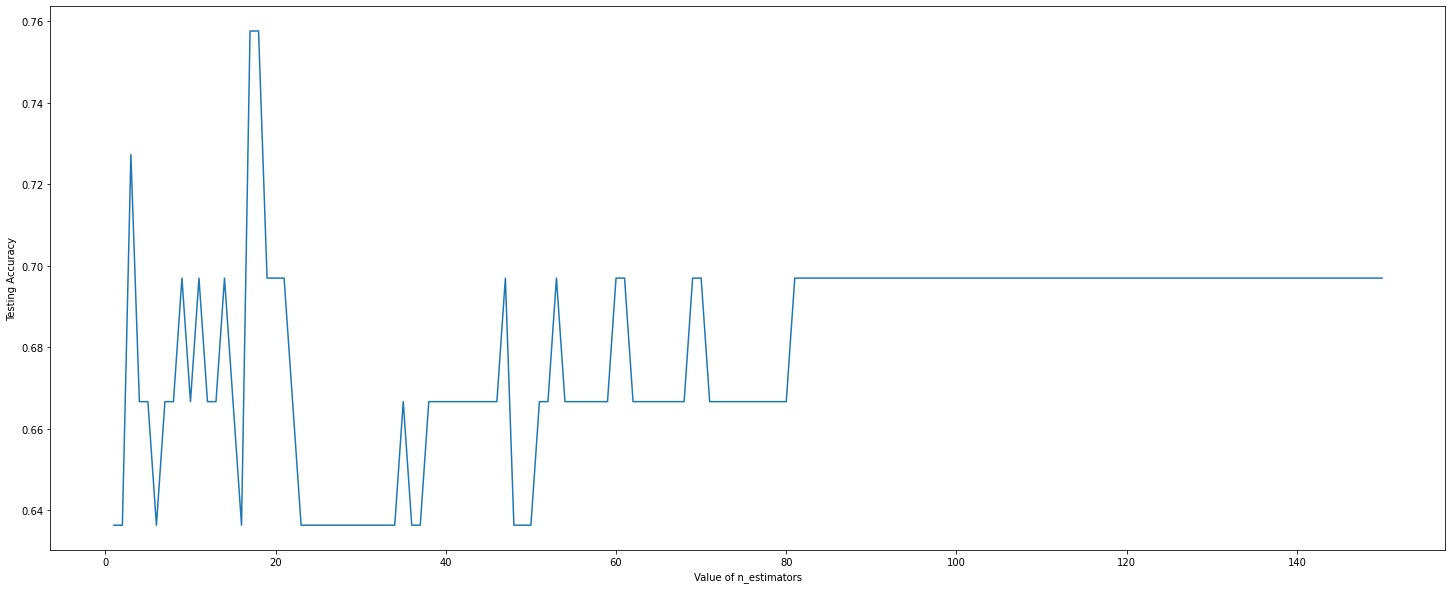

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.6666666666666666
2/30 round completed......................... Accurecy: 0.696969696969697
3/30 round completed......................... Accurecy: 0.696969696969697
4/30 round completed......................... Accurecy: 0.6666666666666666
5/30 round completed......................... Accurecy: 0.6666666666666666
6/30 round completed......................... Accurecy: 0.6060606060606061
7/30 round completed......................... Accurecy: 0.5757575757575758
8/30 round completed......................... Accurecy: 0.696969696969697
9/30 round completed......................... Accurecy: 0.696969696969697
10/30 round completed......................... Accurecy: 0.696969696969697
11/30 round completed......................... Accurecy: 0.696969696969697
12/30 round completed......................... Accurecy: 0.696969696969697
13/30 round completed......................... Accurecy: 0.696969696969697
14/30 round completed........

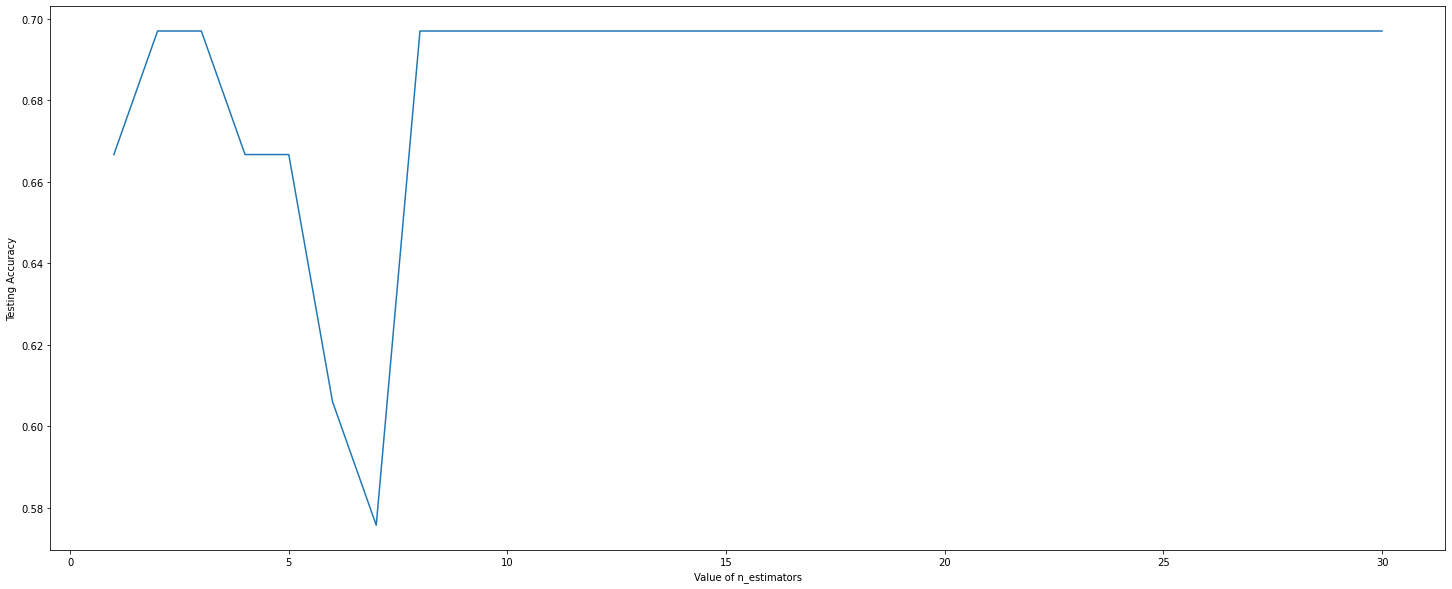

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[14  1]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        15
           1       0.92      0.61      0.73        18

    accuracy                           0.76        33
   macro avg       0.79      0.77      0.76        33
weighted avg       0.80      0.76      0.75        33

Accurecy:  0.7575757575757576


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  2]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.83      0.56      0.67        18

    accuracy                           0.70        33
   macro avg       0.73      0.71      0.69        33
weighted avg       0.74      0.70      0.69        33

Accurecy:  0.696969696969697


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [10  8]]
              precision    recall  f1-score   support

           0       0.55      0.80      0.65        15
           1       0.73      0.44      0.55        18

    accuracy                           0.61        33
   macro avg       0.64      0.62      0.60        33
weighted avg       0.64      0.61      0.60        33

Accurecy:  0.6060606060606061




---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.77      0.56      0.65        18

    accuracy                           0.67        33
   macro avg       0.68      0.68      0.67        33
weighted avg       0.69      0.67      0.66        33

Accurecy:  0.6666666666666666


1/150 round completed......................... Accurecy: 0.696969696969697
2/150 round completed......................... Accurecy: 0.5757575757575758
3/150 round completed......................... Accurecy: 0.696969696969697
4/150 round completed......................... Accurecy: 0.6666666666666666
5/150 round completed......................... Accurecy: 0.7878787878787878
6/150 round completed......................... Accurecy: 0.7575757575757576
7/150 round completed......................... Accurecy: 0.8181818181818182
8/150 round completed......................... Accurecy: 0.7272727272727273
9/150 round completed......................... Accurecy: 0.7272727272727273
10/150 round completed......................... Accurecy: 0.6666666666666666
11/150 round completed......................... Accurecy: 0.696969696969697
12/150 round completed......................... Accurecy: 0.696969696969697
13/150 round completed......................... Accurecy: 0.7272727272727273
14/150 round

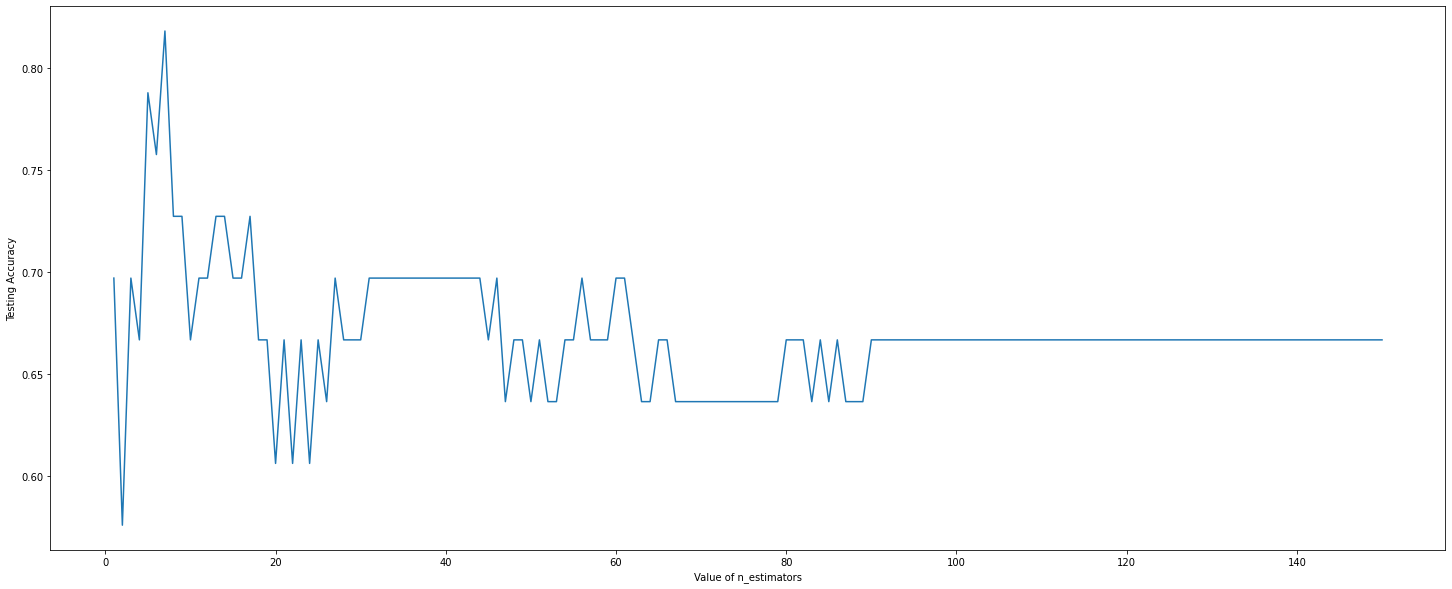

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.6363636363636364
2/150 round completed......................... Accurecy: 0.6363636363636364
3/150 round completed......................... Accurecy: 0.6363636363636364
4/150 round completed......................... Accurecy: 0.6363636363636364
5/150 round completed......................... Accurecy: 0.6363636363636364
6/150 round completed......................... Accurecy: 0.6666666666666666
7/150 round completed......................... Accurecy: 0.6363636363636364
8/150 round completed......................... Accurecy: 0.6666666666666666
9/150 round completed......................... Accurecy: 0.6666666666666666
10/150 round completed......................... Accurecy: 0.6666666666666666
11/150 round completed......................... Accurecy: 0.6666666666666666
12/150 round completed......................... Accurecy: 0.6666666666666666
13/150 round completed......................... Accurecy: 0.6666666666666666
14/150 r

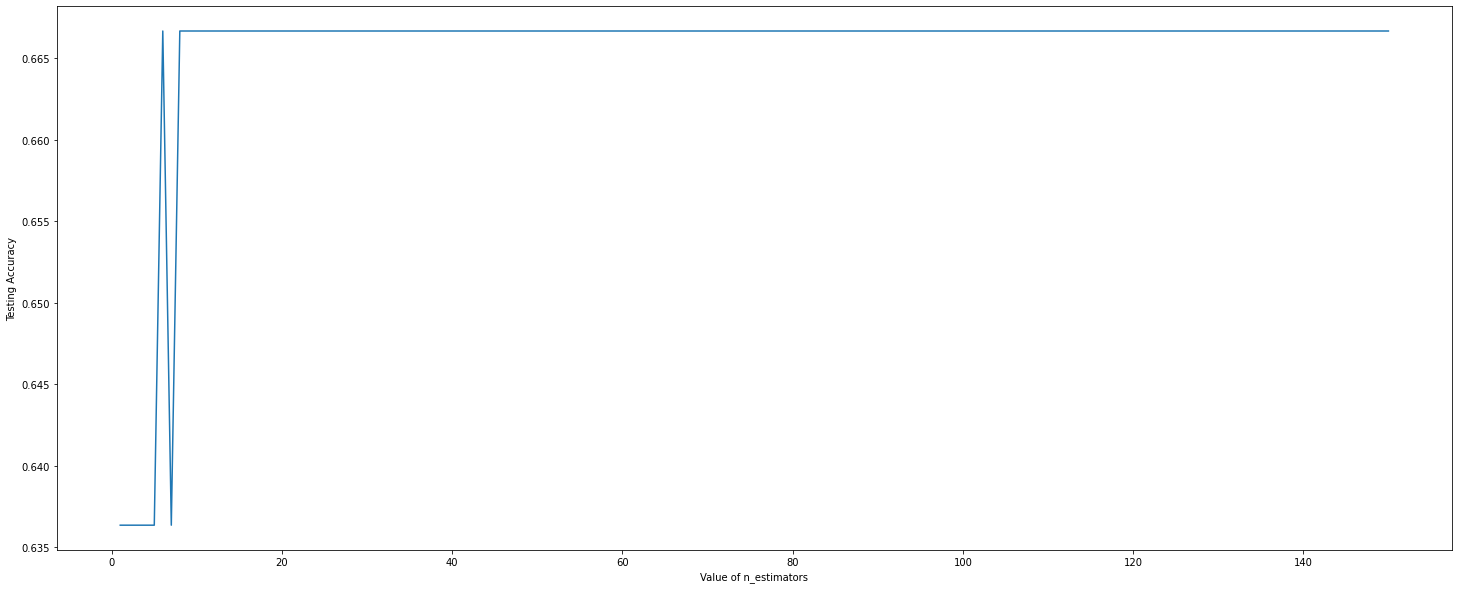

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[13  2]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.88      0.78      0.82        18

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33

Accurecy:  0.8181818181818182


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.77      0.56      0.65        18

    accuracy                           0.67        33
   macro avg       0.68      0.68      0.67        33
weighted avg       0.69      0.67      0.66        33

Accurecy:  0.6666666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.79      0.61      0.69        18

    accuracy                           0.70        33
   macro avg       0.71      0.71      0.70        33
weighted avg       0.72      0.70      0.70        33

Accurecy:  0.696969696969697




---



---



#XGB

In [ ]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[13  2]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        15
           1       0.85      0.61      0.71        18

    accuracy                           0.73        33
   macro avg       0.75      0.74      0.73        33
weighted avg       0.76      0.73      0.72        33

Accurecy:  0.7272727272727273


1/250 round completed......................... Accurecy: 0.696969696969697
2/250 round completed......................... Accurecy: 0.6666666666666666
3/250 round completed......................... Accurecy: 0.6060606060606061
4/250 round completed......................... Accurecy: 0.6666666666666666
5/250 round completed......................... Accurecy: 0.6666666666666666
6/250 round completed......................... Accurecy: 0.696969696969697
7/250 round completed......................... Accurecy: 0.6666666666666666
8/250 round completed......................... Accurecy: 0.6666666666666666
9/250 round completed......................... Accurecy: 0.6363636363636364
10/250 round completed......................... Accurecy: 0.6666666666666666
11/250 round completed......................... Accurecy: 0.6666666666666666
12/250 round completed......................... Accurecy: 0.6666666666666666
13/250 round completed......................... Accurecy: 0.6666666666666666
14/250 rou

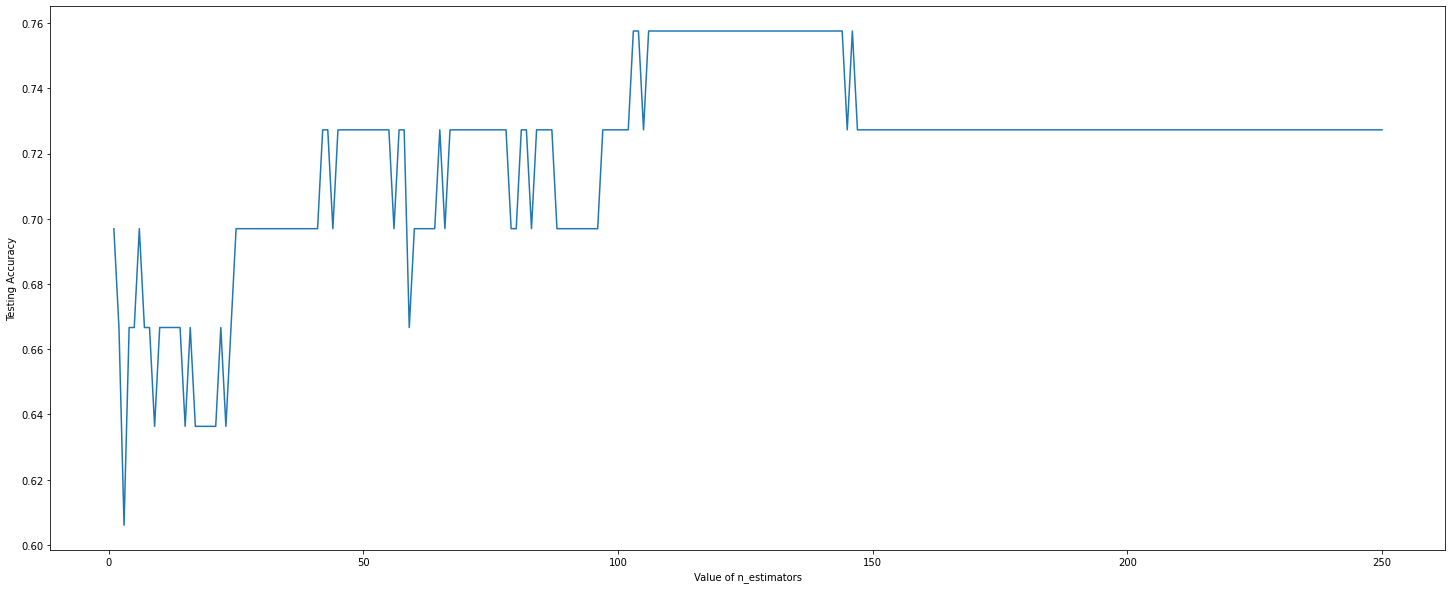

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.6363636363636364
2/250 round completed......................... Accurecy: 0.6666666666666666
3/250 round completed......................... Accurecy: 0.7272727272727273
4/250 round completed......................... Accurecy: 0.6363636363636364
5/250 round completed......................... Accurecy: 0.6363636363636364
6/250 round completed......................... Accurecy: 0.6666666666666666
7/250 round completed......................... Accurecy: 0.6666666666666666
8/250 round completed......................... Accurecy: 0.5757575757575758
9/250 round completed......................... Accurecy: 0.5757575757575758
10/250 round completed......................... Accurecy: 0.5757575757575758
11/250 round completed......................... Accurecy: 0.5757575757575758
12/250 round completed......................... Accurecy: 0.5757575757575758
13/250 round completed......................... Accurecy: 0.5757575757575758
14/250 r

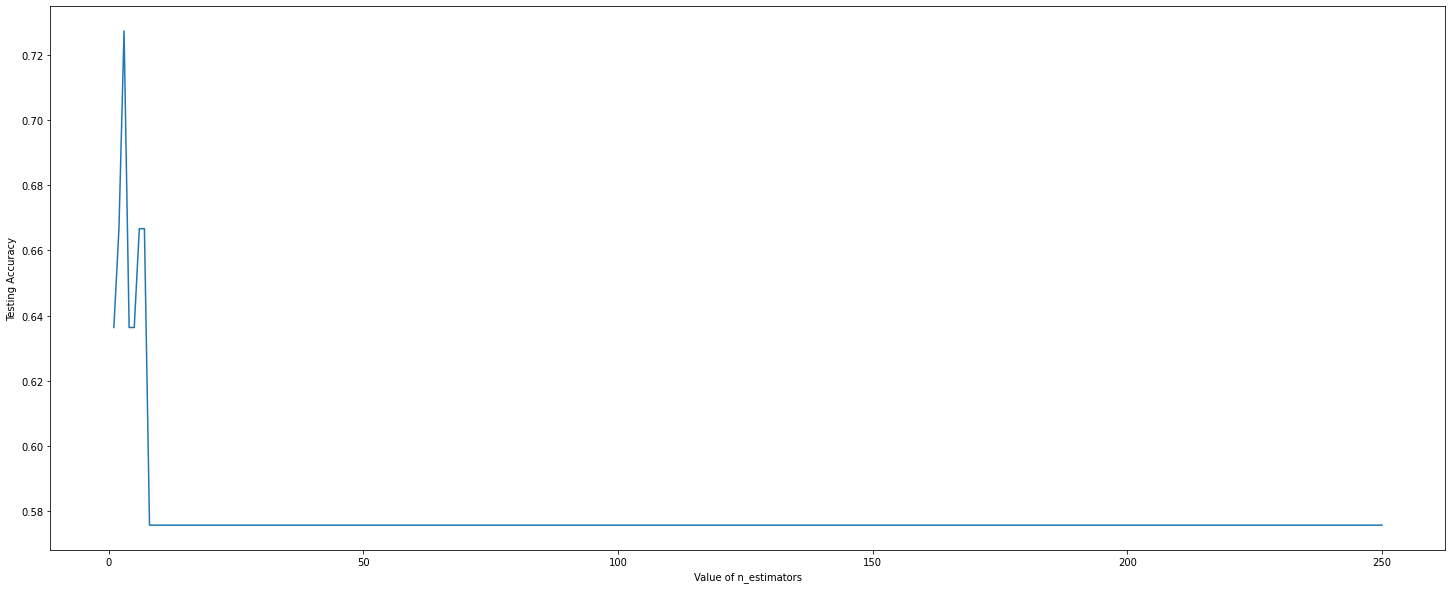

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[13  2]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        15
           1       0.85      0.61      0.71        18

    accuracy                           0.73        33
   macro avg       0.75      0.74      0.73        33
weighted avg       0.76      0.73      0.72        33

Accurecy:  0.7272727272727273


In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[13  2]
 [ 6 12]]
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        15
           1       0.86      0.67      0.75        18

    accuracy                           0.76        33
   macro avg       0.77      0.77      0.76        33
weighted avg       0.78      0.76      0.76        33

Accurecy:  0.7575757575757576


In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[13  2]
 [ 6 12]]
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        15
           1       0.86      0.67      0.75        18

    accuracy                           0.76        33
   macro avg       0.77      0.77      0.76        33
weighted avg       0.78      0.76      0.76        33

Accurecy:  0.7575757575757576


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[14  1]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        15
           1       0.92      0.61      0.73        18

    accuracy                           0.76        33
   macro avg       0.79      0.77      0.76        33
weighted avg       0.80      0.76      0.75        33

Accurecy:  0.7575757575757576


1/130 round completed......................... Accurecy: 0.6060606060606061
2/130 round completed......................... Accurecy: 0.6363636363636364
3/130 round completed......................... Accurecy: 0.7272727272727273
4/130 round completed......................... Accurecy: 0.7575757575757576
5/130 round completed......................... Accurecy: 0.7575757575757576
6/130 round completed......................... Accurecy: 0.7272727272727273
7/130 round completed......................... Accurecy: 0.7575757575757576
8/130 round completed......................... Accurecy: 0.7272727272727273
9/130 round completed......................... Accurecy: 0.7272727272727273
10/130 round completed......................... Accurecy: 0.7272727272727273
11/130 round completed......................... Accurecy: 0.7272727272727273
12/130 round completed......................... Accurecy: 0.6363636363636364
13/130 round completed......................... Accurecy: 0.696969696969697
14/130 ro

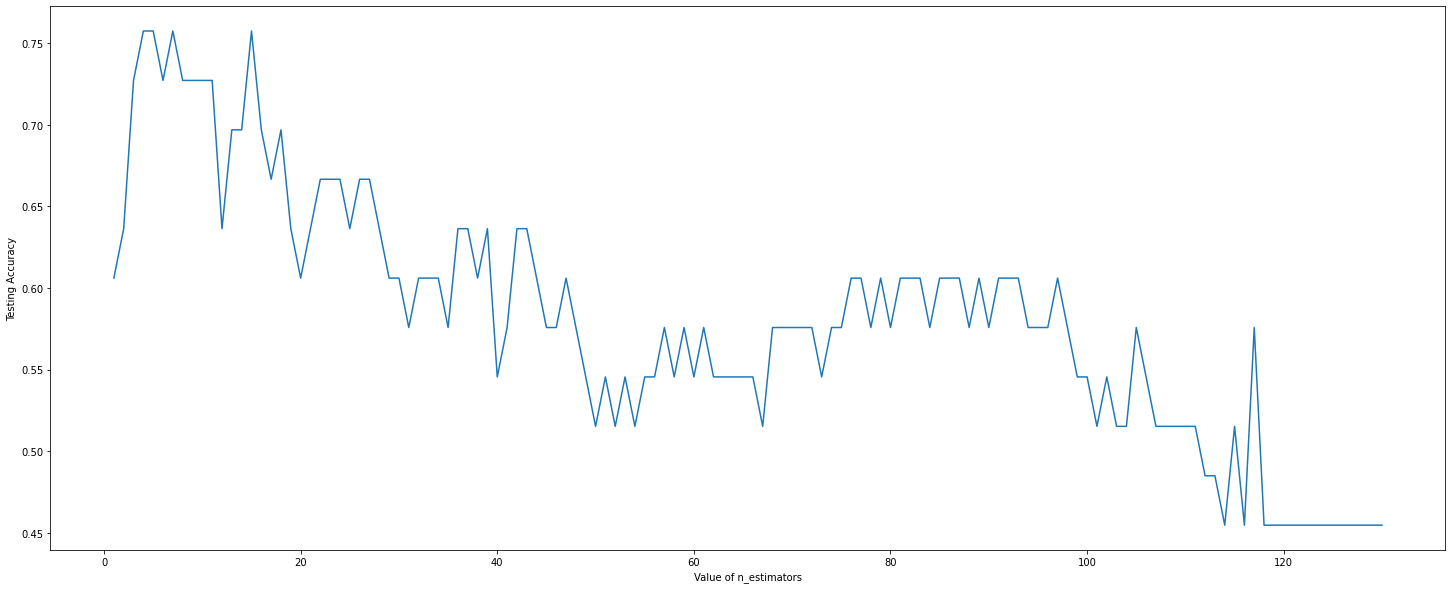

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=130
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[15  0]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        15
           1       1.00      0.56      0.71        18

    accuracy                           0.76        33
   macro avg       0.83      0.78      0.75        33
weighted avg       0.84      0.76      0.75        33

Accurecy:  0.7575757575757576


#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.81      0.72      0.76        18

    accuracy                           0.76        33
   macro avg       0.76      0.76      0.76        33
weighted avg       0.76      0.76      0.76        33

Accurecy:  0.7575757575757576




---



---



#Result

In [ ]:
for i in result:
  print(i[0]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier(random_state=0)  :  0.696969696969697
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=2, random_state=0)  :  0.696969696969697
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0)  :  0.696969696969697
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=17, random_state=0)  :  0.7575757575757576
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=2, random_state=0)  :  0.696969696969697
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=2, n_estimators=17, random_state=0)  :  0.6060606060606061
---------------------------------------------------------------

RandomForestClassifier(random_state=0)  :  0.6666666666666666
---------------------------------------------------------------

RandomForestClassifier(n_estima

In [ ]:
best_models=[]
sorted_values = sorted(result.values(),reverse=True) 
sorted_result = {}

for i in sorted_values:
    for k in result.keys():
        if result[k] == i:
            sorted_result[k] = result[k]
            break



flage=[]
it=0

print("Best Models and Accuracy")
for i in sorted_result:
  if it==4:
    break
  if i[1] not in flage:
    print("---------------")
    best_models.append((i[0],i[2]))
    print(i[0]," : ",sorted_result[i])
    y_pred = i[0].predict(X_test)

    flage.append(i[1])
    it+=1

Best Models and Accuracy
---------------
RandomForestClassifier(n_estimators=7, random_state=0)  :  0.8181818181818182
---------------
GradientBoostingClassifier(n_estimators=17, random_state=0)  :  0.7575757575757576
---------------
XGBClassifier()  :  0.7272727272727273
---------------
AdaBoostClassifier(random_state=0)  :  0.696969696969697


In [ ]:
len(best_models)

4

#ROC

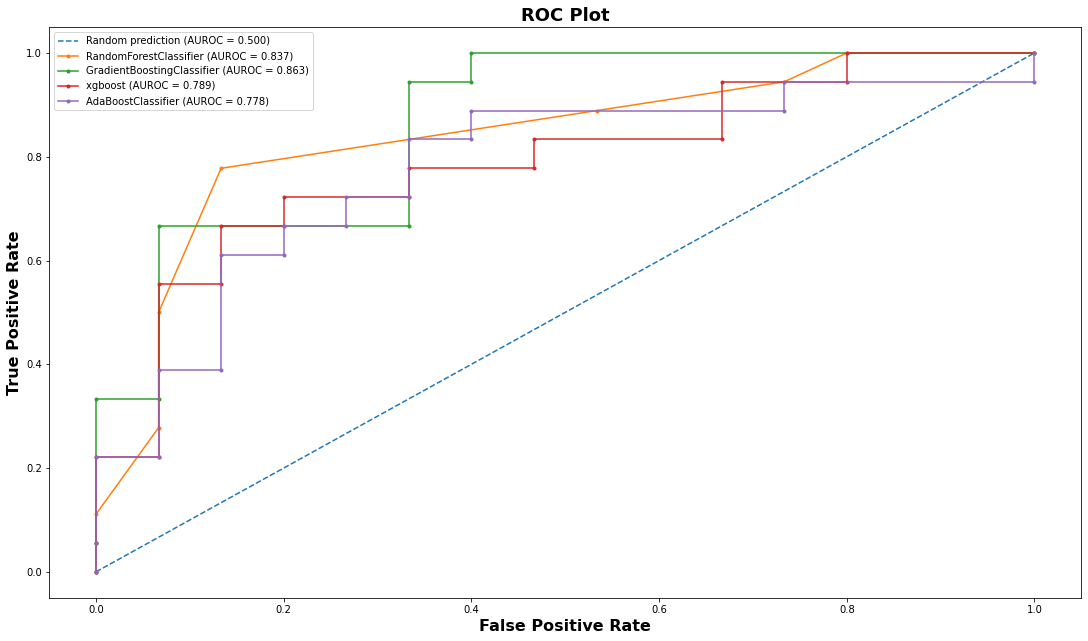

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
model1_probs = best_models[0][0].predict_proba(X_test)
model2_probs = best_models[1][0].predict_proba(X_test)
if len(best_models)>2:
  model3_probs=  best_models[2][0].predict_proba(X_test)
if len(best_models)>3:
  model4_probs=  best_models[3][0].predict_proba(X_test)


model1_probs = model1_probs[:, 1]
model2_probs = model2_probs[:, 1]
if len(best_models)>2:
  model3_probs=  model3_probs[:, 1]
if len(best_models)>3:
  model4_probs=  model4_probs[:, 1]



from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
model1_auc = roc_auc_score(y_test, model1_probs)
model2_auc = roc_auc_score(y_test, model2_probs)
if len(best_models)>2:
  model3_auc = roc_auc_score(y_test, model3_probs)
if len(best_models)>3:
  model4_auc = roc_auc_score(y_test, model4_probs)



r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
model1_fpr, model1_tpr, _ = roc_curve(y_test, model1_probs)
model2_fpr, model2_tpr, _ = roc_curve(y_test, model2_probs)
if len(best_models)>2:
  model3_fpr, model3_tpr, _ = roc_curve(y_test, model3_probs)
if len(best_models)>3:
  model4_fpr, model4_tpr, _ = roc_curve(y_test, model4_probs)



import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(model1_fpr, model1_tpr, marker='.', label=best_models[0][1]+' (AUROC = %0.3f)' % model1_auc)
plt.plot(model2_fpr, model2_tpr, marker='.', label=best_models[1][1]+' (AUROC = %0.3f)' % model2_auc)
if len(best_models)>2:
  plt.plot(model3_fpr, model3_tpr, marker='.', label=best_models[2][1]+' (AUROC = %0.3f)' % model3_auc)
if len(best_models)>3:
  plt.plot(model4_fpr, model4_tpr, marker='.', label=best_models[3][1]+' (AUROC = %0.3f)' % model4_auc)

# Title
plt.title('ROC Plot',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC.png', dpi=100)
plt.show()

#SHAP

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


#SHAP MODEL 1

In [ ]:
print("Models: ",best_models[0][1])

explainer = shap.Explainer(best_models[0][0].predict, X_test)

shap_values1 = explainer(X_test)
features_names=list_of_feat

Models:  RandomForestClassifier


Models:  RandomForestClassifier(n_estimators=7, random_state=0)


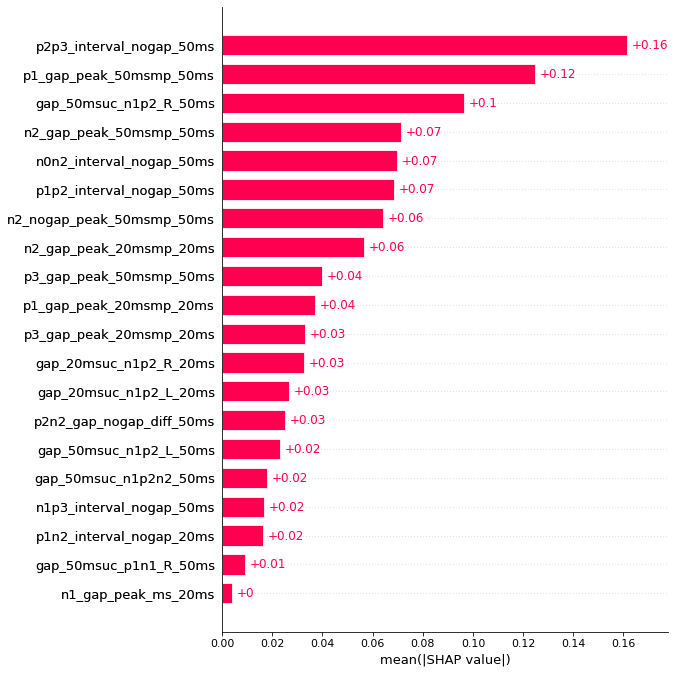

In [ ]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1,max_display=20)

Models:  RandomForestClassifier(n_estimators=7, random_state=0)


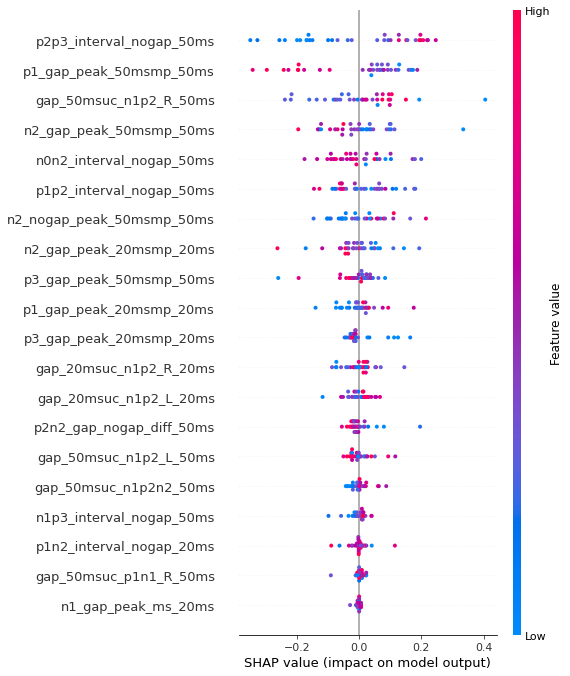

In [ ]:
print("Models: ",best_models[0][0])
shap.summary_plot(shap_values1,max_display=20,feature_names=features_names)

**Local Explanation** <br>
You can change the index of <i>shap_values1[index]</i> to accure the desired output. 

Models:  RandomForestClassifier(n_estimators=7, random_state=0)


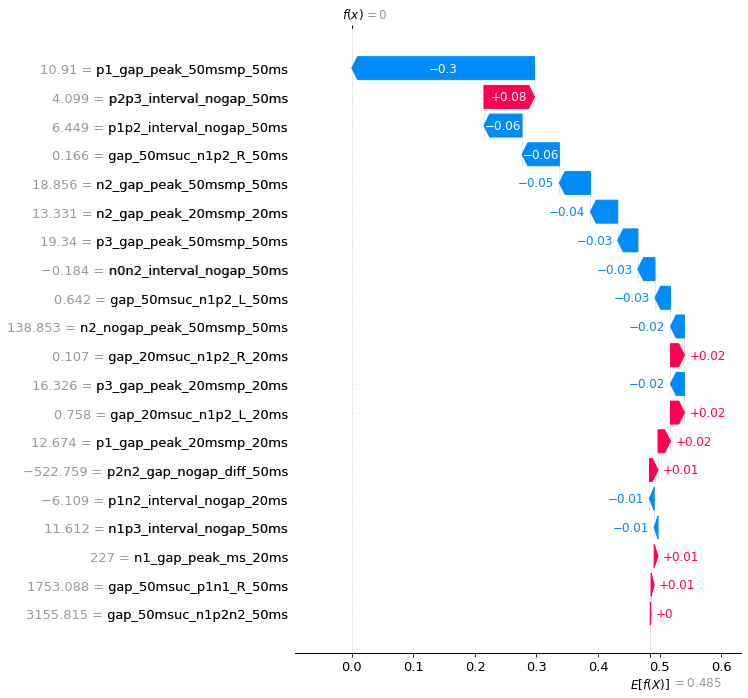

In [ ]:
print("Models: ",best_models[0][0])
shap.plots.waterfall(shap_values1[2],max_display=20)

Models:  RandomForestClassifier(n_estimators=7, random_state=0)


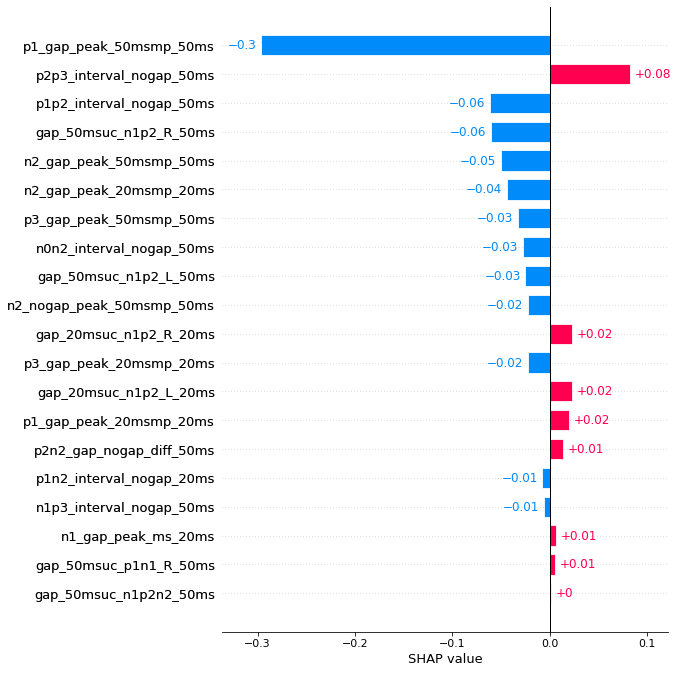

In [ ]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1[2],max_display=20)

#SHAP MODEL2

In [ ]:
print("Models: ",best_models[1][0])

explainer = shap.Explainer(best_models[1][0].predict, X_test)

shap_values2 = explainer(X_test)
features_names=list_of_feat

Models:  GradientBoostingClassifier(n_estimators=17, random_state=0)


**Global Explanation**

Models:  GradientBoostingClassifier(n_estimators=17, random_state=0)


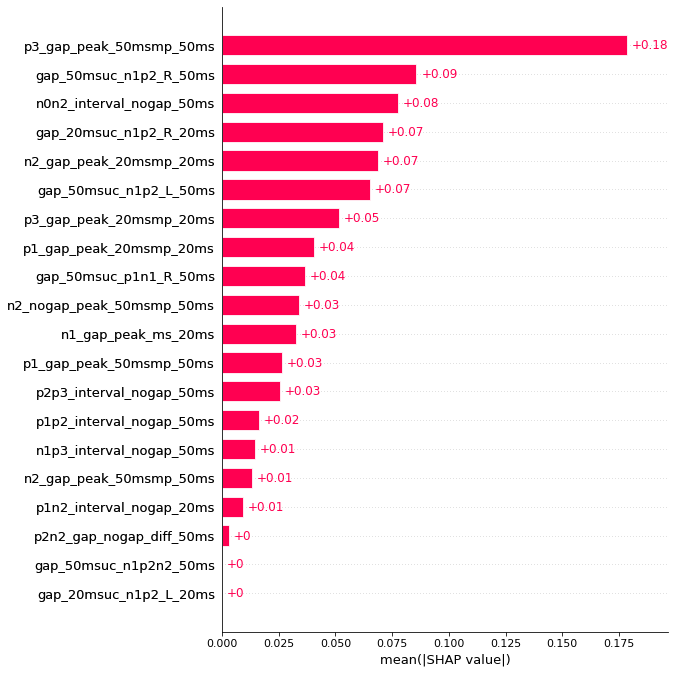

In [ ]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2,max_display=20)

Models:  GradientBoostingClassifier(n_estimators=17, random_state=0)


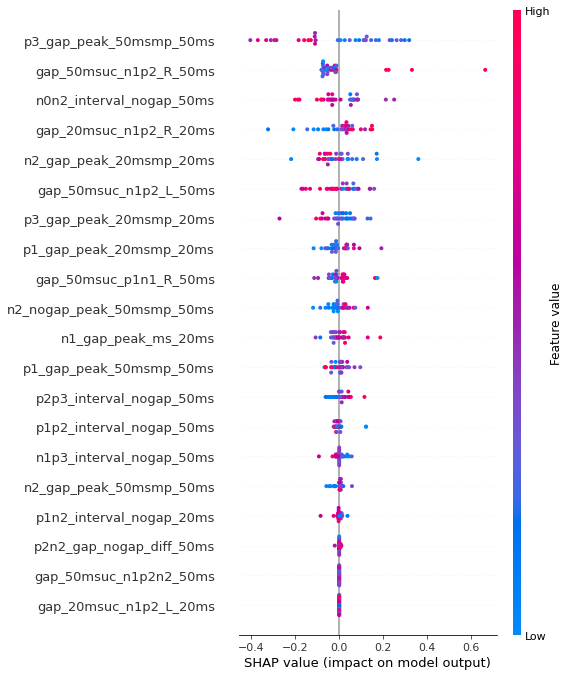

In [ ]:
print("Models: ",best_models[1][0])
shap.summary_plot(shap_values2,max_display=20,feature_names=features_names)

**Local Explanation**

Models:  GradientBoostingClassifier(n_estimators=17, random_state=0)


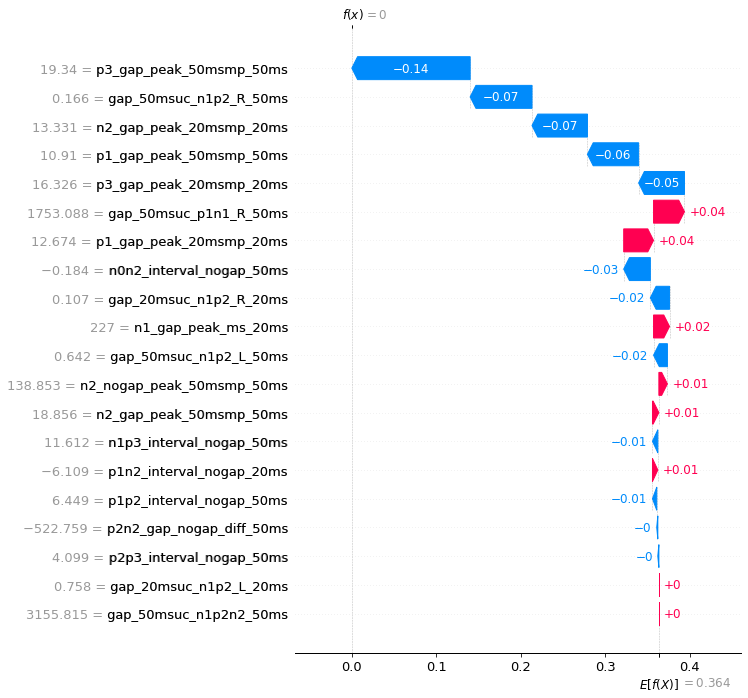

In [ ]:
print("Models: ",best_models[1][0])
shap.plots.waterfall(shap_values2[2],max_display=20)

Models:  GradientBoostingClassifier(n_estimators=17, random_state=0)


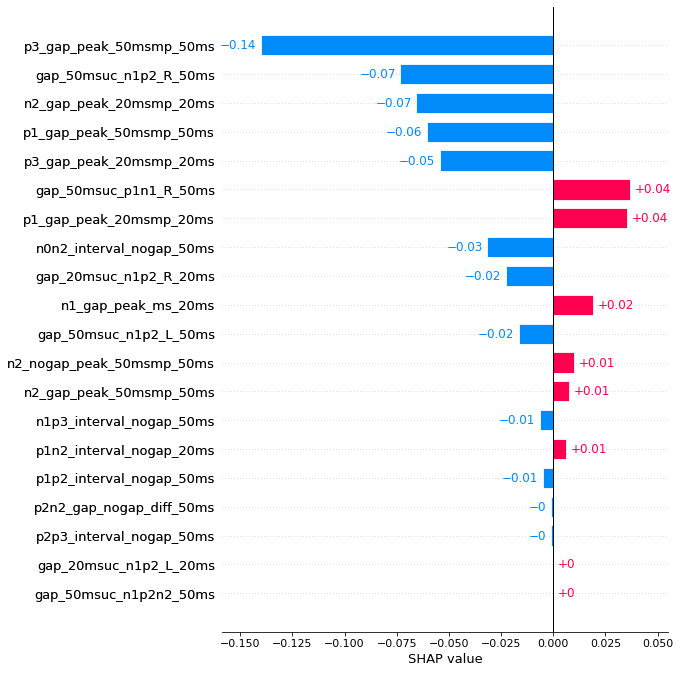

In [ ]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2[2],max_display=20)

#SHAP MODEL 3

In [ ]:
print("Models: ",best_models[2][0])

explainer = shap.Explainer(best_models[2][0].predict, X_test)

shap_values3 = explainer( X_test)
features_names=list_of_feat

Models:  XGBClassifier()


**Global**

Models:  XGBClassifier()


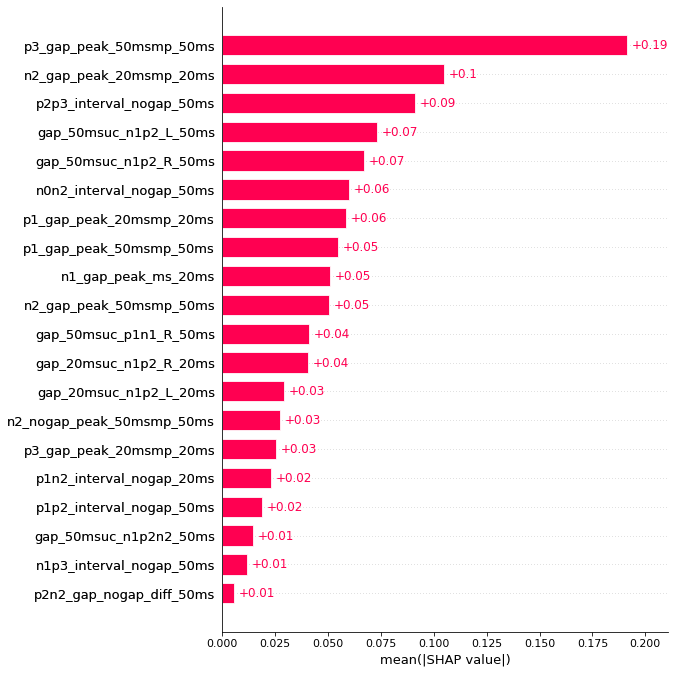

In [ ]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3,max_display=20)

Models:  XGBClassifier()


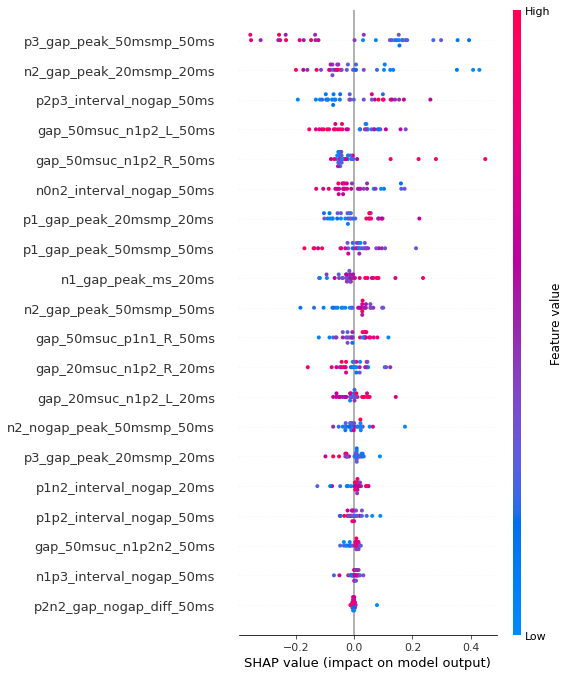

In [ ]:
print("Models: ",best_models[2][0])
shap.summary_plot(shap_values3,max_display=20,feature_names=features_names)

**LOCAL**

Models:  XGBClassifier()


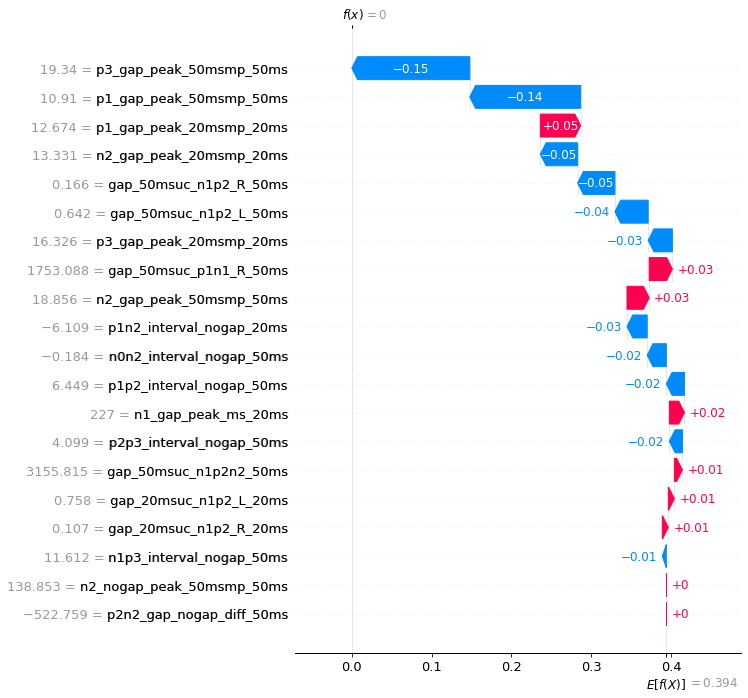

In [ ]:
print("Models: ",best_models[2][0])
shap.plots.waterfall(shap_values3[2],max_display=20)

Models:  XGBClassifier()


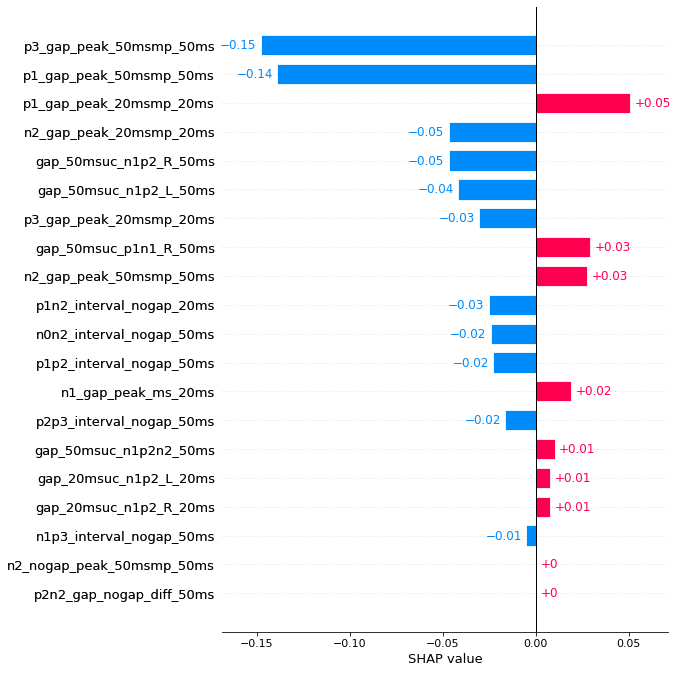

In [ ]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3[2],max_display=20)

In [ ]:
shap.dependence_plot(0, shap_values1, X_test.values)
p3_gap_peak_50msmp_50ms



TypeError: ignored

#Confusion Matrix

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


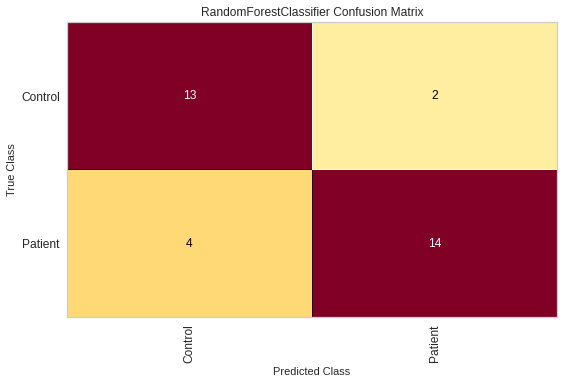

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


cm = ConfusionMatrix(best_models[0][0], classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


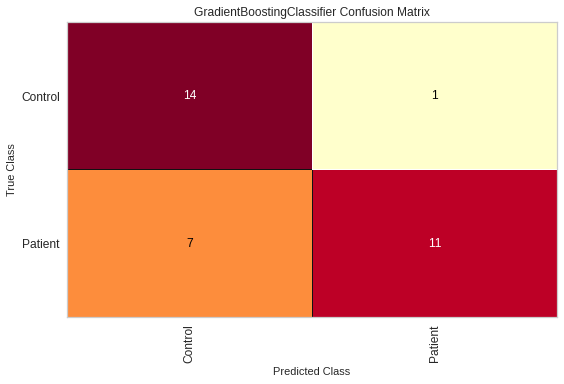

In [ ]:
cm2 = ConfusionMatrix(best_models[1][0], classes=classes)

cm2.fit(X_train, y_train)
cm2.score(X_test, y_test)
cm2.show()

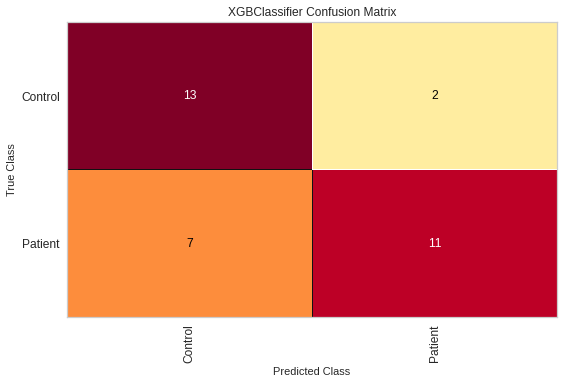

In [ ]:


cm3 = ConfusionMatrix(best_models[2][0], classes=classes)

cm3.fit(X_train, y_train)
cm3.score(X_test, y_test)
cm3.show()